In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

class Exp:
    """
    class that handles exponential regression
    """
    def __init__(self, data, country, type_int):
        """
        data is from data.py
        country is a string containing the country name
        type is an int:
        0 => confirmed
        1 => dead
        2 => recovered
        """
        self.data = data
        self.country = country
        self.type_int = type_int
        self.types = ["confirmed", "deaths", "recovered"]
        self.get_data()
        self.exp_reg()
    def get_data(self):
        """
        Gathers data from given dataset
        """
        self.x = -1
        self.y = -1
        if self.type_int == 0:
            self.x = np.array([i for i in range(len(self.data.confirmed_dict[self.country]))])
            self.y = np.array(self.data.confirmed_dict[self.country])
        elif self.type_int == 1:
            self.x = np.array([i for i in range(len(self.data.death_dict[self.country]))])
            self.y = np.array(self.data.death_dict[self.country])
        elif self.type_int == 2:
            self.x = np.array([i for i in range(len(self.data.recover_dict[self.country]))])
            self.y = np.array(self.data.recover_dict[self.country])
    def transform_parameters(self):
        """
        takes log of y, and log of 1 when y==0
        """
        ys = []
        for v in self.y:
            if v <= 0:
                ys.append(np.log(1))
            else:
                ys.append(np.log(v))
        self.y_trans = ys
    def fit(self):
        """
        fits the data and makes prediction
        """
        self.f = np.polyfit(self.x,self.y_trans, 1, w=np.sqrt(self.y))
        self.y_pred = np.array([np.exp(self.f[1]) * np.exp(self.f[0] * i) for i in self.x])
    def score(self):
        """
        gets r^2 value
        """
        self.score = r2_score(self.y, self.y_pred)
    def get_form(self):
        """
        gets a string form of the equation for the given model
        """
        self.form = str(np.exp(self.f[1])) + "*" + str(np.exp(self.f[0])) + "x"
    def get_rmse(self):
        """
        gets the rmse value for the predicted function
        """
        self.rmse = np.sqrt(mean_squared_error(self.y, self.y_pred))
    def exp_reg(self):
        """
        func takes any parameter and predicts the output
        """
        self.transform_parameters()
        self.fit()
        self.score()
        self.get_form()
        self.get_rmse()
        self.func = lambda x: np.exp(self.f[1]) * np.exp(self.f[0]*x)
    def show(self):
        """
        shows the prediction function graphed against the original function
        labels are r^2
        """
        plt.scatter(self.x, self.y)
        plt.title("{} vs. time".format(self.types[self.type_int]))
        plt.xlabel("days since 1/22/2022")
        plt.ylabel("# {}".format(self.types[self.type_int]))
        plt.plot(self.x, self.y_pred, label="r^2: {:.2f}".format(self.score))
        plt.legend(loc='upper left')
        plt.show()
    def pred(self, val):
        """
        predicts for any given value
        """
        return self.func(val)

class Poly:
    def __init__(self, data, country, type):
        """
        data is from data.py
        country is a string containing the country name
        type is an int:
        0 => confirmed
        1 => dead
        2 => recovered
        """
        self.data = data
        self.country = country
        self.type = type
        self.types = ["confirmed", "deaths", "recovered"]
        self.get_data()
        self.transform_data()
        self.poly_reg()
    def get_data(self):
        self.x = -1
        self.y = -1
        if self.type == 0:
            self.x = np.array(range(len(self.data.confirmed_dict[self.country])))
            self.y = np.array(self.data.confirmed_dict[self.country])
        elif self.type == 1:
            self.x = np.array([i for i in range(len(self.data.death_dict[self.country]))])
            self.y = np.array(self.data.death_dict[self.country])
        elif self.type == 2:
            self.x = np.array([i for i in range(len(self.data.recover_dict[self.country]))])
            self.y = np.array(self.data.recover_dict[self.country])
    def transform_data(self):
        self.x_change = np.array(self.x).reshape(-1, 1)
        self.y_change = np.array(self.y).reshape(-1, 1)
    def model_fit(self, d):
        self.poly_features = PolynomialFeatures(degree=d)
        self.x_poly = self.poly_features.fit_transform(self.x_change)
        self.model = LinearRegression()
        self.model.fit(self.x_poly, self.y_change)
        self.y_pred = self.model.predict(self.x_poly)
        self.score = r2_score(self.y_change, self.y_pred)
        self.rmse = np.sqrt(mean_squared_error(self.y_change, self.y_pred))
    def poly_reg(self):
        best_r2 = 0
        best_d = 0
        self.best_degrees = []
        for i in range(50):
            self.model_fit(i)
            print("model: "+ str(i)+" fit")
            if self.score > best_r2:
                best_r2 = self.score
                best_d = i
                self.best_degrees.append(i)
        self.best_degree = self.best_degrees[-1]
        self.model_fit(self.best_degree)
    def pred(self, val):
        pred_val = self.poly_features.fit_transform(np.array(val).reshape(-1,1))
        pred = self.model.predict(pred_val)
        return pred[0][0]
    def show(self):
        plt.plot(self.x, self.y, "go")
        plt.plot(self.x, self.y_pred,"k--")
        plt.show()

class Log:
    def __init__(self, data, country, type):
        self.data = data
        self.country = country
        self.type = type
        self.types = ["confirmed", "dead", "recovered"]
        self.rec_pred = 0
        self.get_data()
        self.resize()
        self.fit()
    def get_data(self):
        self.x = -1
        self.y = -1
        if self.type == 0:
            self.x = np.array([i for i in range(len(self.data.confirmed_dict[self.country]))]).reshape(-1,1)
            self.y = np.array(self.data.confirmed_dict[self.country]).reshape(-1,1)
        elif self.type == 1:
            self.x = np.array([i for i in range(len(self.data.death_dict[self.country]))]).reshape(-1,1)
            self.y = np.array(self.data.death_dict[self.country]).reshape(-1,1)
        elif self.type == 2:
            self.x = np.array([i for i in range(len(self.data.recover_dict[self.country]))]).reshape(-1,1)
            self.y = np.array(self.data.recover_dict[self.country]).reshape(-1,1)
    def resize(self):
        self.scaler = StandardScaler()
        self.x_scaled = self.scaler.fit_transform(self.x, self.y)
        self.y_scaled = self.scaler.transform(self.y)
        self.y_scaled = np.ravel(self.y_scaled)
    def fit(self):
        self.regr = LogisticRegression(random_state=13, max_iter=70000)
        self.regr.fit(self.x,np.ravel(self.y))
        self.y_pred = self.regr.predict(self.x)
        self.score = self.regr.score(self.x, self.y, self.y_pred)
    def pred(self, inp):
        val = np.array(inp).reshape(1,-1)
        self.rec_pred = self.regr.predict(val)
        return self.rec_pred[0]
    def show(self):
        plt.plot(self.x, self.y,"g-")
        plt.plot(self.x, self.y_pred, "k--", alpha=0.5, label="Score: {:.2f}".format(self.score))
        plt.legend(loc="upper left")
        plt.show()

model: 0 fit
model: 1 fit
model: 2 fit
model: 3 fit
model: 4 fit
model: 5 fit
model: 6 fit
model: 7 fit
model: 8 fit
model: 9 fit
model: 10 fit
model: 11 fit
model: 12 fit
model: 13 fit
model: 14 fit
model: 15 fit
model: 16 fit
model: 17 fit
model: 18 fit
model: 19 fit
model: 20 fit
model: 21 fit
model: 22 fit
model: 23 fit
model: 24 fit
model: 25 fit
model: 26 fit
model: 27 fit
model: 28 fit
model: 29 fit
model: 30 fit
model: 31 fit
model: 32 fit
model: 33 fit
model: 34 fit
model: 35 fit
model: 36 fit
model: 37 fit
model: 38 fit
model: 39 fit
model: 40 fit
model: 41 fit
model: 42 fit
model: 43 fit
model: 44 fit
model: 45 fit
model: 46 fit
model: 47 fit
model: 48 fit
model: 49 fit


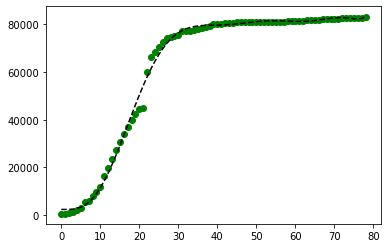

89299.43340454368

In [2]:
import dataset
data = dataset.Data()

reg = Poly(data, "China", 0)
reg.show()
reg.pred(80)